<h2>LINEAR REGRESSION WITH TENSORFLOW</h2>

<h3>Objective for this Notebook<h3>    
<h5> 1. What is Linear Regression</h5>
<h5> 2. Linear Regression with TensorFlow. </h5>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>In this notebook we will overview the implementation of Linear Regression with TensorFlow</strong></font>
<br>
<br>
<h2>Table of Contents</h2>
<ol>
 <li><a href="#ref1">Linear Regression</a></li>
 <li><a href="#ref2">Linear Regression with TensorFlow</a></li>
</ol>
</div>
<br>
<br>
<p></p>
<hr>


<a id="ref1"></a>

<h1>Linear Regression</h1>

Defining a linear regression in simple terms, is the approximation of a linear model used to describe the relationship between two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" that we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states". 

When more than one independent variable is present the process is called multiple linear regression. <br>
When multiple dependent variables are predicted the process is known as multivariate linear regression.

The equation of a simple linear model is

$$Y = a X + b $$

Where Y is the dependent variable and X is the independent variable, and <b>a</b> and <b>b</b> being the parameters we adjust. <b>a</b> is known as "slope" or "gradient" and <b>b</b> is the "intercept". You can interpret this equation as Y being a function of X, or Y being dependent on X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis.


We begin by installing TensorFlow version 2.2.0 and its required prerequistes.


In [1]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.2.0

     |████████████████████████████████| 14.0 MB 2.7 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/huzaifahsaleem/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/x3/p4cg48592lq4sc1b381w_mbm0000gn/T/pip-install-4mfu_xbk/grpcio/setup.py'"'"'; __file__='"'"'/private/var/folders/x3/p4cg48592lq4sc1b381w_mbm0000gn/T/pip-install-4mfu_xbk/grpcio/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/x3/p4cg48592lq4sc1b381w_mbm0000gn/T/pip-wheel-qma2y73g
       cwd: /private/var/folders/x3/p4cg48592lq4sc1b381w_mbm0000gn/T/pip-install-4mfu_xbk/grpcio/
  Complete output (1102 lines):
  Found cython-generated files...
  running bdist_wheel
  running build
  running build_py
  running build_project_metadata
  creating python_build
  creating python_bu

  gcc -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/Users/huzaifahsaleem/opt/anaconda3/include -arch x86_64 -I/Users/huzaifahsaleem/opt/anaconda3/include -arch x86_64 -DOPENSSL_NO_ASM=1 -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 -DPyMODINIT_FUNC=extern "C" __attribute__((visibility ("default"))) PyObject* -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/boringssl/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Ithird_party/zlib -I/Users/huzaifahsaleem/opt/anaconda3/include/python3.8 -c src/core/lib/gpr/time_precise.cc -o python_build/temp.macosx-10.9-x86_64-3.8/src/core/lib/gpr/time_precise.o -std=c++11 -stdlib=libc++ -fvisibility=hidden -fno-wrapv -fno-exceptions -pthread
  gcc -Wno-unused-result -Wsign

Failed to build grpcio
    Running setup.py install for grpcio ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/huzaifahsaleem/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/x3/p4cg48592lq4sc1b381w_mbm0000gn/T/pip-install-4mfu_xbk/grpcio/setup.py'"'"'; __file__='"'"'/private/var/folders/x3/p4cg48592lq4sc1b381w_mbm0000gn/T/pip-install-4mfu_xbk/grpcio/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/x3/p4cg48592lq4sc1b381w_mbm0000gn/T/pip-record-aeqaayth/install-record.txt --single-version-externally-managed --compile --install-headers /Users/huzaifahsaleem/opt/anaconda3/include/python3.8/grpcio
         cwd: /private/var/folders/x3/p4cg48592lq4sc1b381w_mbm0000gn/T/pip-install-4mfu_xbk/grpcio/
    Complete output (1099 lines):
    Found

    gcc -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/Users/huzaifahsaleem/opt/anaconda3/include -arch x86_64 -I/Users/huzaifahsaleem/opt/anaconda3/include -arch x86_64 -DOPENSSL_NO_ASM=1 -D_WIN32_WINNT=1536 -DGPR_BACKWARDS_COMPATIBILITY_MODE=1 -DHAVE_CONFIG_H=1 -DGRPC_ENABLE_FORK_SUPPORT=1 -DPyMODINIT_FUNC=extern "C" __attribute__((visibility ("default"))) PyObject* -DGRPC_POSIX_FORK_ALLOW_PTHREAD_ATFORK=1 -Isrc/python/grpcio -Iinclude -I. -Ithird_party/address_sorting/include -Ithird_party/cares -Ithird_party/cares/cares -Ithird_party/cares/config_darwin -Ithird_party/boringssl/include -Ithird_party/upb -Isrc/core/ext/upb-generated -Ithird_party/zlib -I/Users/huzaifahsaleem/opt/anaconda3/include/python3.8 -c src/core/ext/upb-generated/envoy/api/v2/cluster/filter.upb.c -o python_build/temp.macosx-10.9-x86_64-3.8/src/core/ext/upb-generated/envoy/api/v2/cluster/filter.upb.o -stdlib=libc++ -fvisibility=hidden -fno-wrapv -fno-exc

     |████████████████████████████████| 175.4 MB 181 kB/s eta 0:00:01
     |████████████████████████████████| 127 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 454 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 28.8 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 114 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 779 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 3.

**Restart kernel for latest version of TensorFlow to be activated**


Next, let's first import the required packages:


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
if not tf.__version__ == '2.2.0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.2.0, or restart your Kernel (Kernel->Restart & Clear Output)')

IMPORTANT! => Please restart the kernel by clicking on "Kernel"->"Restart and Clear Outout" and wait until all output disapears. Then your changes are beeing picked up


Let's define the independent variable:


In [4]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

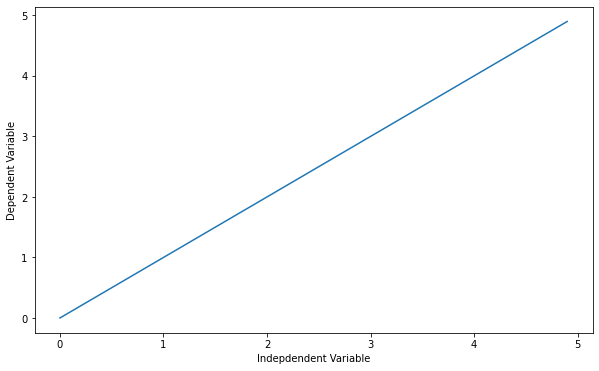

In [5]:
##You can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

OK... but how can we see this concept of linear relations with a more meaningful point of view?

Simple linear relations were used to try to describe and quantify many observable physical phenomena, the easiest to understand are speed and distance traveled:


$$Distance Traveled = Speed \\times Time + Initial Distance$$

$$Speed = Acceleration \\times Time + Initial Speed$$


They are also used to describe properties of different materials:


$$Force = Deformation \\times Stiffness$$

$$Heat Transfered = Temperature Difference \\times Thermal Conductivity$$

$$Electrical Tension (Voltage) = Electrical Current \\times Resistance$$

$$Mass =  Volume \\times Density$$


When we perform an experiment and gather the data, or if we already have a dataset and we want to perform a linear regression, what we will do is adjust a simple linear model to the dataset, we adjust the "slope" and "intercept" parameters to the data the best way possible, because the closer the model comes to describing each ocurrence, the better it will be at representing them.

So how is this "regression" performed?


<hr>


<a id="ref2"></a>

<h1>Linear Regression with TensorFlow</h1>
A simple example of a linear function can help us understand the basic mechanism behind TensorFlow.

For the first part we will use a sample dataset, and then we'll use TensorFlow to adjust and get the right parameters. We will use a dataset that is related to fuel consumption and Carbon dioxide emission of cars.



<h2>Understanding the Data</h2>

<h3><code>FuelConsumption.csv</code>:</h3>
We have downloaded a fuel consumption dataset, <b><code>FuelConsumption.csv</code></b>, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. <a href="http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64">Dataset source</a>

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


### For importing Dataset on IBM Cloud:
click on the 2nd option from the top right to add the dataset into the notebook as a pandas dataframe

In [8]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets say we want to use linear regression to predict Co2Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, train_x and train_y:


In [ ]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

First, we initialize the variables <b>a</b> and <b>b</b>, with any random guess, and then we define the linear function:


In [ ]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)


def h(x):
   y = a*x + b
   return y

Now, we are going to define a loss function for our regression, so we can train our model to better fit our data. In a linear regression, we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to minimize the square of the predicted values minus the target value. So we define the equation to be minimized as loss.

To find value of our loss, we use <b>tf.reduce_mean()</b>. This function finds the mean of a multidimensional tensor, and the result can have a different dimension.


In [ ]:
def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))
    # Below is a predefined method offered by TensorFlow to calculate loss function
    #loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

Now we are ready to start training and run the graph. We use GradientTape to calculate gradients:


In [ ]:
learning_rate = 0.01
train_data = []
loss_values =[]
# steps of looping through all your data to update the parameters
training_epochs = 200

# train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_object(train_y,y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [b,a])
        
        # compute and adjust weights
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])




Lets plot the loss values to see how it has changed during the training:


In [ ]:
plt.plot(loss_values, 'ro')

Lets visualize how the coefficient and intercept of line has changed to fit the data:


In [ ]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')
green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

* * *


## Want to learn more?

Running deep learning programs usually needs a high performance platform. **PowerAI** speeds up deep learning and AI. Built on IBM’s Power Systems, **PowerAI** is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The **PowerAI** platform supports popular machine learning libraries and dependencies including TensorFlow, Caffe, Torch, and Theano. You can use [PowerAI on IMB Cloud](https://cocl.us/ML0120EN_PAI).

Also, you can use **Watson Studio** to run these notebooks faster with bigger datasets.**Watson Studio** is IBM’s leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, **Watson Studio** enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of **Watson Studio** users today with a free account at [Watson Studio](https://cocl.us/ML0120EN_DSX).This is the end of this lesson. Thank you for reading this notebook, and good luck on your studies.


### Thanks for completing this Tutorial!

If you are familiar with some of these methods and concepts, this tutorial might have been boring for you, but it is important to get used to the TensorFlow mechanics, and feel familiar and comfortable using it, so you can build more complex algorithms in it.

Created by <a href="https://linkedin.com/in/romeo-kienzler-089b4557"> Romeo Kienzler </a>, <a href="https://linkedin.com/in/saeedaghabozorgi"> Saeed Aghabozorgi </a> , <a href="https://ca.linkedin.com/in/rafaelblsilva"> Rafael Belo Da Silva</a><br>

Updated to TF 2.X by  <a href="https://www.linkedin.com/in/samaya-madhavan"> Samaya Madhavan </a>


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                          |
| ----------------- | ------- | ---------- | ----------------------------------------------------------- |
| 2020-09-21        | 2.0     | Srishti    | Migrated Lab to Markdown and added to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


<hr>

Copyright © 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
